In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# read in csv
df = pd.read_csv('../data/Production_Crops_E_All_Data_NOFLAG.csv', encoding = "ISO-8859-1")

# clean column names
cols = df.columns
cols = [col.lower().replace(' ', '_') for col in cols]
new_cols = []
for col in cols:
    if col[0] == 'y':
        new_cols.append(col[1:])
    else:
        new_cols.append(col)
df.columns = new_cols

df = df[df['area_code']<1000]
df = df[df['area'] != 'China, mainland']

In [143]:
def global_change_rate(crop,element='Yield'):
    df_filtered = df.loc[(df['item'] == crop) & (df['element'] == element)]
    change_rate = []
    for i in range(1,57):
        rate = (np.mean(df_filtered.iloc[:,i+7])/np.mean(df_filtered.iloc[:,i+6]))
        change_rate.append(rate -1)
    return change_rate

global_change_rate('Avocados')

[0.004804371204696789,
 -0.0026374063845140405,
 -0.012645819940318992,
 -0.006313127386712858,
 -0.023990595911725254,
 0.03104760828326336,
 -0.0019541522528339073,
 -0.020397122098865683,
 -0.050620969418661566,
 -0.0038807007135468474,
 0.00810404649390084,
 -0.015541061499790065,
 -0.03283670574815567,
 0.026307683115984082,
 -0.03960559223160032,
 0.0026777012782746024,
 -0.02416096317247085,
 0.013593339987262976,
 0.04124701552661558,
 -0.05928968252878353,
 0.028736221325872835,
 0.029624763239393115,
 -0.022619390530007055,
 -0.10813929139816447,
 0.04411598180006826,
 0.018034612507990433,
 -0.06626121200906798,
 0.001206779054832019,
 -0.007146997289583901,
 0.13472914606895436,
 -0.0038843241190718025,
 -0.019669619126254645,
 -0.024574020733489688,
 0.018568848364757473,
 0.034596643902455204,
 0.06301649054105996,
 0.0061687130504284315,
 0.005836070103922841,
 0.03262412265877246,
 0.11466857813772013,
 -0.005392420148252364,
 -0.005033248532460122,
 -0.0436302393539896

In [144]:
def global_constant_increase(element='Yield',threshold=.001):
    crops = df['item'].unique()
    
    lst=[]
    
    for crop in crops:
        rate_changes = global_change_rate(crop,element)
        current_count = 0
        max_count = 0
        for rate in rate_changes:
            if rate > threshold:
                current_count += 1
            else:
                if max_count < current_count:
                    max_count = current_count
                current_count = 0
        if max_count < current_count:
            max_count = current_count
        lst.append((crop,max_count))
    
    return pd.DataFrame(lst).sort_values(1,ascending=False)

In [145]:
global_constant_increase('Yield',0)

,0,1
49,Vegetables Primary,15
169,Cloves,13
158,"Nutmeg, mace and cardamoms",13
173,Cassava leaves,12
73,"Pumpkins, squash and gourds",10
38,Cereals (Rice Milled Eqv),10
42,Fibre Crops Primary,10
76,Sorghum,10
39,"Cereals,Total",10
166,Melonseed,10


In [87]:
def plot_top_countries(crop,element='Yield'):
    df_filtered = df.loc[(df['item'] == crop) & (df['element'] == element)]
    df_filtered['avg']=df_filtered.iloc[:,7:].mean(axis=1)
    df_filtered = df_filtered.sort_values('avg',ascending=False).head(10)
    
    fig,ax = plt.subplots(figsize=(16,10))
    
    for i in range(df_filtered.shape[0]):
        x=df_filtered.columns[7:64]
        y=df_filtered.iloc[i,7:64]   
        ax.plot (x,y)
        for label in ax.xaxis.get_ticklabels()[::2]:
            label.set_visible(False)
        ax.set_title('{}, {} by Country (top 5 producers on average)'.format(crop,element),size=18)
        ax.set_xlabel('Year',size=18)
        ylabel = df_filtered['unit'].head(1).iloc[0]
        ax.set_ylabel(ylabel,size=18)
        ax.legend(labels=df_filtered['area'].values)
    plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


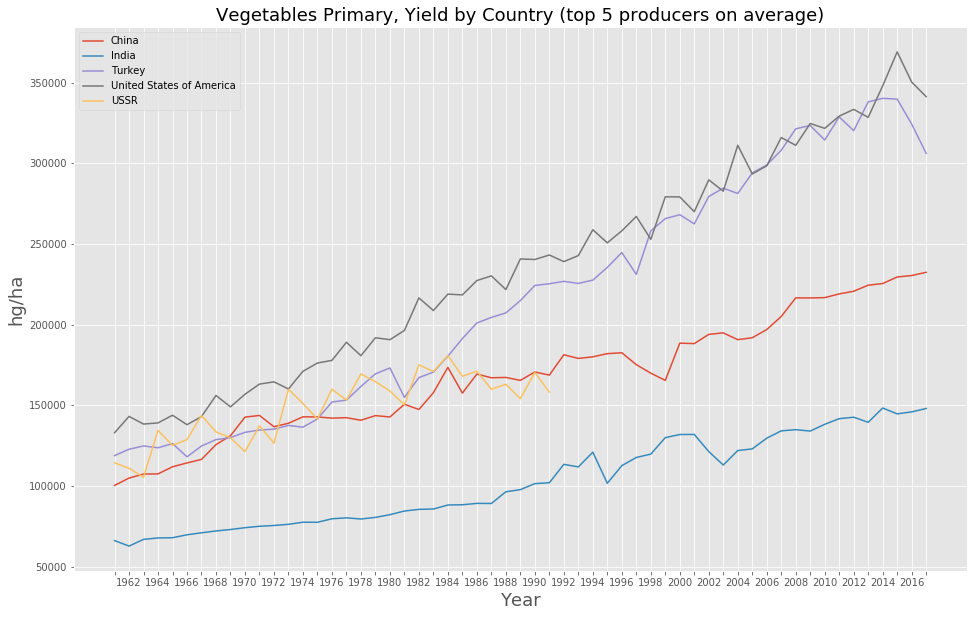

In [147]:
plot_top_countries('Vegetables Primary','Yield')

In [148]:
def plot_top_countries(crop,element='Yield'):
    df_crop = df.loc[df['item'] == crop]
    df_crop_prod = df_crop.loc[df['element'] == 'Production']
    df_crop_prod['avg'] = df_crop_prod.iloc[:,7:].mean(axis=1)
    df_crop_prod = df_crop_prod.sort_values('avg',ascending=False).head(5)
    countries = list(df_crop_prod['area'])
    df_filtered = df.loc[(df['item'] == crop) & (df['element'] == element) & (df['area'].isin(countries))]
    
    fig,ax = plt.subplots(figsize=(16,10))
    
    for i in range(df_filtered.shape[0]):
        x=df_filtered.columns[7:64]
        y=df_filtered.iloc[i,7:64]   
        ax.plot (x,y)
        for label in ax.xaxis.get_ticklabels()[::2]:
            label.set_visible(False)
        ax.set_title('{}, {} by Country (top 5 producers on average)'.format(crop,element),size=18)
        ax.set_xlabel('Year',size=18)
        ylabel = df_filtered['unit'].head(1).iloc[0]
        ax.set_ylabel(ylabel,size=18)
        ax.legend(labels=df_filtered['area'].values)
    plt.savefig('../images/clovesprodcountries.png')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


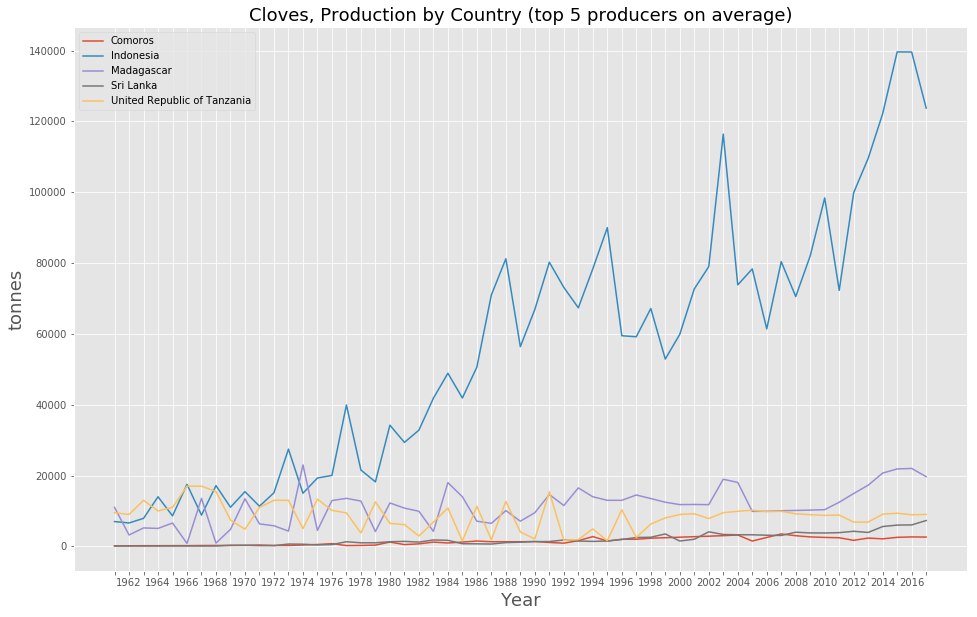

In [150]:
plot_top_countries('Cloves','Production')